In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
path=r'C:\Users\R726653\Downloads\daily-treasury-rates.csv'
df=pd.read_csv(path, parse_dates=True)

In [5]:
df.head()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,08/08/2022,2.23,2.43,2.65,3.15,3.30,3.21,3.14,2.91,2.85,2.77,3.22,3.00
1,08/05/2022,2.21,2.39,2.58,3.10,3.29,3.24,3.18,2.97,2.91,2.83,3.27,3.06
2,08/04/2022,2.19,2.36,2.50,2.98,3.11,3.03,2.95,2.76,2.73,2.68,3.15,2.97
3,08/03/2022,2.20,2.29,2.52,3.00,3.14,3.10,3.04,2.86,2.81,2.73,3.17,2.96
4,08/02/2022,2.22,2.33,2.56,3.00,3.09,3.06,3.02,2.85,2.82,2.75,3.22,3.00


In [6]:
treasurythirty= df['30 Yr'].rolling(window=30).mean()
treasury=df['30 Yr']
treasurydev= df['30 Yr'].rolling(window=30).std()
bands=df['30 Yr'].rolling(window=30).mean()+treasurydev
bandsdown=df['30 Yr'].rolling(window=30).mean()-treasurydev



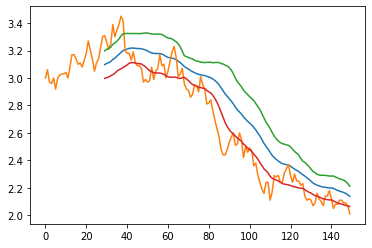

In [7]:
import matplotlib.pyplot as plt
plt.plot(treasurythirty)
plt.plot(treasury)
plt.plot(bands)
plt.plot(bandsdown)


In [8]:
pip install scikit-learn

Looking in indexes: https://artifacts.jpmchase.net/artifactory/api/pypi/pypi/simple/
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\JPMC\DEV\TMP\ds\tools\python3.8\latest\python.exe -m pip install --upgrade pip' command.


In [9]:
from sklearn import svm

In [10]:

df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].astype('int64')


In [11]:
daysarr=[]
i=0
iarr=[]
for day in df['Date']:
    i+=1
    iarr.append(i)
    daysarr.append(day)
daysarr=np.reshape(daysarr, (-1,1))
iarr=np.reshape(iarr, (-1,1))

In [12]:
yieldarr=[]
for y in reversed( df['30 Yr']):
    yieldarr.append(y)
# yieldarr=np.reshape(yieldarr, (-1,1))

In [32]:
poly_svr=svm.SVR(kernel='poly', degree=1.5)
poly_svr.fit(iarr, yieldarr)

SVR(degree=1.5, kernel='poly')

In [33]:
forecasts=[]
xaxis=[]
for y in range (151, 250):
    polyforecast=poly_svr.predict([[y]])
    forecasts.append(polyforecast)
    xaxis.append(y)


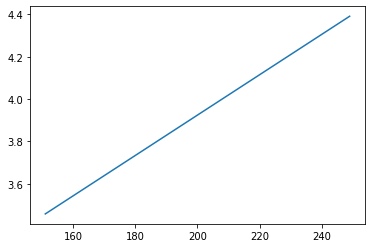

In [34]:
plt.plot(xaxis,forecasts)

In [35]:
rbf_svr=svm.SVR(kernel='rbf', C=200)
rbf_svr.fit(iarr, yieldarr)

SVR(C=200)

In [36]:
newforecasts=[]
xax=[]
for x in range (151, 200):
    rbfforecast=rbf_svr.predict([[x]])
    newforecasts.append(rbfforecast)
    xax.append(x)

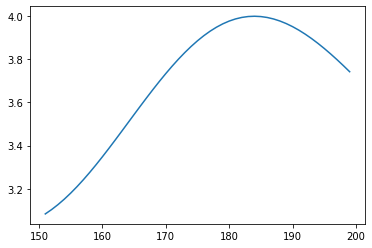

In [37]:
plt.plot(xax,newforecasts)
# plt.plot()

array([3.7423421])

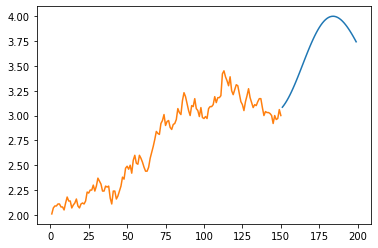

In [38]:
treasurythirty=df['30 Yr'].reindex(index=df['30 Yr'].index[::-1])
plt.plot(xax,newforecasts)
plt.plot(iarr, treasurythirty)
newforecasts[-1]

In [39]:
newforecasts[25:40]

[array([3.90919864]),
 array([3.93024392]),
 array([3.94859818]),
 array([3.96418148]),
 array([3.9769361]),
 array([3.9868263]),
 array([3.9938379]),
 array([3.9979776]),
 array([3.9992722]),
 array([3.99776756]),
 array([3.99352744]),
 array([3.9866323]),
 array([3.97717784]),
 array([3.96527359]),
 array([3.95104136])]

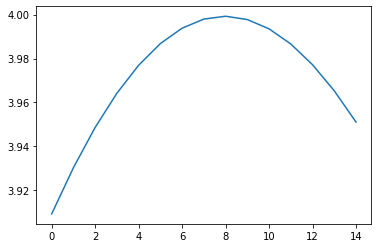

In [40]:
plt.plot(newforecasts[25:40])